In [ ]:
# Imporing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import pickle

# Data Loading

In [ ]:
# Loading the Data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("hand_landmarks_data.csv")

In [ ]:
# Making sure the data is successfully loaded
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,241.453918,0.005872,230.076668,243.947525,0.005236,238.130150,233.234192,0.000154,225.652794,247.249207,-0.003813,226.056931,255.866364,-0.006753,228.159897,260.384155,-0.007799,236.882492,238.052338,-0.004955,226.113327,252.712662,-0.010097,229.431679,260.451080,-0.014108,232.641357,265.248962,-0.016854,236.293053,244.317657,-0.009528,225.111259,256.214203,-0.016194,227.390144,263.649139,-0.020701,230.754410,268.069519,-0.023142,236.512527,251.706177,-0.013198,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,298.860626,-0.029252,94.470360,287.298767,-0.034743,108.349709,308.093719,-0.022332,126.623394,317.461853,-0.033495,120.436695,321.913879,-0.039811,113.516293,320.967957,-0.044990,112.661499,318.378937,-0.024038,126.470741,326.580048,-0.032438,119.046581,329.816071,-0.033811,114.183495,329.230194,-0.036610,115.033024,330.221741,-0.026222,129.401276,335.143341,-0.034942,123.797516,337.128418,-0.030081,118.561386,336.647949,-0.027561,116.245079,341.947784,-0.029042,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,209.035360,-0.020580,214.772873,196.609588,-0.029497,227.154053,225.576852,-0.016897,245.390419,237.862886,-0.023851,239.404152,244.408742,-0.024241,232.023811,244.865198,-0.024215,229.581985,237.329024,-0.025533,245.673843,248.809410,-0.029864,238.769005,254.638094,-0.027649,231.852882,253.995576,-0.027500,230.325073,251.093664,-0.033584,246.591980,260.490353,-0.038898,240.098305,265.280085,-0.033344,233.025467,264.505473,-0.030234,230.100174,265.584175,-0.041256,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,301.874115,-0.015029,116.766609,294.977814,-0.019514,129.777031,308.501129,-0.010413,139.635818,310.151733,-0.016497,136.397449,312.745758,-0.020082,131.874081,313.205322,-0.023151,132.963112,315.039551,-0.014133,141.762932,315.943848,-0.018309,138.536854,317.723969,-0.019228,134.968494,319.064636,-0.021387,134.844761,322.039795,-0.017837,143.293087,322.025909,-0.021707,140.613567,323.325195,-0.018406,137.043560,324.407806,-0.017291,135.485836,329.050110,-0.021804,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,98.687691,-0.013397,188.239563,90.394289,-0.017483,202.827484,110.826588,-0.013008,219.390350,112.392162,-0.019843,215.733658,117.425114,-0.022405,210.229782,118.631218,-0.024263,206.339752,118.629364,-0.016029,221.155609,120.211258,-0.021682,217.215561,124.373337,-0.022350,212.064911,125.186268,-0.023731,209.829666,126.978264,-0.018826,223.595139,127.696289,-0.023907,219.652115,130.917194,-0.020978,214.071228,131.502628,-0.019323,213.105820,135.293209,-0.021623,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


# Data Exploration

In [ ]:
# Understanding the nature of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [5]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,231.684450,-0.022772,202.966979,226.269003,-0.029150,202.748369,226.255575,-0.011015,203.047902,213.496471,-0.023341,203.025185,206.581444,-0.031587,202.939537,200.498964,-0.036539,202.332967,226.209064,-0.014324,202.520204,213.070576,-0.026699,202.481818,207.660820,-0.033022,202.434025,202.627671,-0.035749,202.027209,229.245052,-0.018841,202.177061,220.038483,-0.032494,202.211731,220.993717,-0.034022,202.232146,221.068921,-0.032048,201.721609,234.378377,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,74.923091,0.017201,80.777001,75.433577,0.020555,81.486053,74.174662,0.011410,78.660264,75.193943,0.016304,77.695517,76.414925,0.019864,77.304606,77.817092,0.022231,85.044490,74.757306,0.012105,84.003401,76.411499,0.018234,83.878024,78.804974,0.020896,83.966876,81.326327,0.022003,89.052866,75.530619,0.013458,89.047221,76.805159,0.020278,88.354398,78.553745,0.021083,88.068275,80.635173,0.021304,93.354905,76.412992,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,38.851536,-0.223258,13.243541,19.964561,-0.282578,23.007730,41.025543,-0.176002,7.846868,12.058107,-0.242614,24.513308,27.764654,-0.279875,20.750772,11.701990,-0.302675,26.686532,38.545681,-0.178811,11.681391,17.029541,-0.230100,21.732645,24.313637,-0.269950,12.205227,9.170517,-0.282490,18.742111,35.284714,-0.170851,8.862213,15.022144,-0.271215,11.509277,21.557108,-0.278481,13.415025,11.011627,-0.253293,4.522356,30.686922,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,177.897360,-0.030877,139.830317,172.346912,-0.038417,135.349077,173.119514,-0.016189,139.631676,160.014862,-0.030574,141.088646,151.965836,-0.040268,141.518023,144.926865,-0.046269,131.467953,172.890533,-0.019602,133.723944,158.572586,-0.034752,134.446735,151.556170,-0.042468,134.941040,145.513020,-0.045741,128.587727,175.506911,-0.024630,130.301594,165.454178,-0.041456,130.504211,165.620058,-0.043919,130.167824,164.591892,-0.042403,126.202721,180.296774,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,226.828033,-0.020179,200.140117,221.246796,-0.025666,199.457932,221.213181,-0.009502,199.514259,208.351471,-0.020488,199.270821,201.778839,-0.027943,199.146263,195.717651,-0.032342,199.286728,220.864047,-0.012345,199.699150,20

In [ ]:
# Checking if the data contains nulls
df.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
z2       0
x3       0
y3       0
z3       0
x4       0
y4       0
z4       0
x5       0
y5       0
z5       0
x6       0
y6       0
z6       0
x7       0
y7       0
z7       0
x8       0
y8       0
z8       0
x9       0
y9       0
z9       0
x10      0
y10      0
z10      0
x11      0
y11      0
z11      0
x12      0
y12      0
z12      0
x13      0
y13      0
z13      0
x14      0
y14      0
z14      0
x15      0
y15      0
z15      0
x16      0
y16      0
z16      0
x17      0
y17      0
z17      0
x18      0
y18      0
z18      0
x19      0
y19      0
z19      0
x20      0
y20      0
z20      0
x21      0
y21      0
z21      0
label    0
dtype: int64

In [ ]:
# Checking if the data is balanced or not
df['label'].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
fist                945
Name: count, dtype: int64

# Data Visualization

C:\Users\Hend-PC\AppData\Local\Temp\ipykernel_13744\3721714988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")


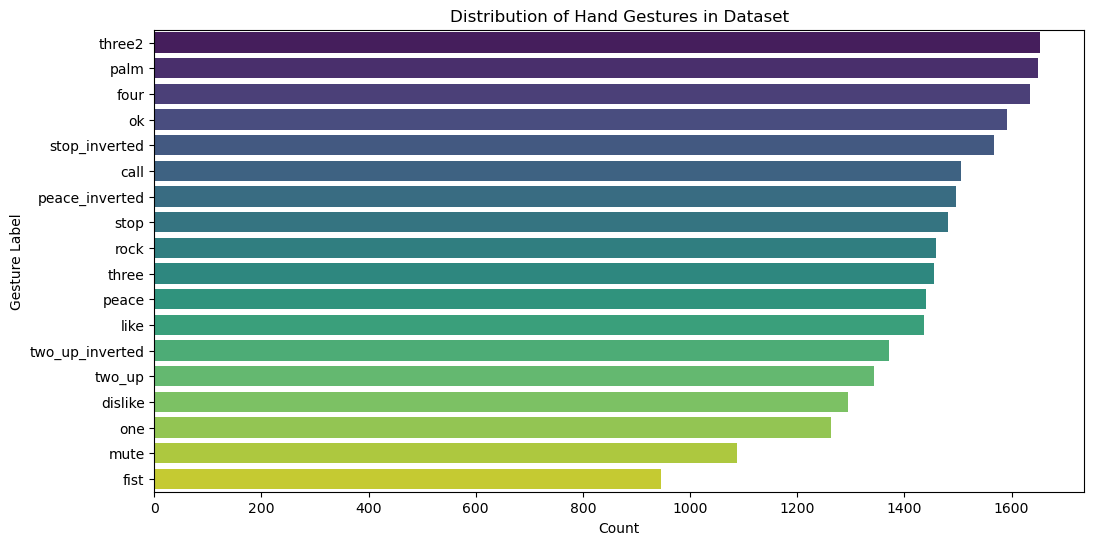

In [ ]:
# Visualizing the count of each class
plt.figure(figsize=(12, 6))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Gesture Label")
plt.title("Distribution of Hand Gestures in Dataset")
plt.show()

In [ ]:
# Visualizing the different classes 
def plot_hand_gesture(df, sample_index):

    sample = df.iloc[sample_index]
    x_coords = [sample[f'x{i}'] for i in range(1, 22)]
    y_coords = [sample[f'y{i}'] for i in range(1, 22)]
    y_coords = np.max(y_coords) - np.array(y_coords)

    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring finger
        (0, 17), (13, 17), (17, 18), (18, 19), (19, 20)  # Pinky finger
    ]

    plt.figure(figsize=(5, 5))
    plt.scatter(x_coords, y_coords, color='red', label="Keypoints")
    for connection in connections:
        x1, y1 = x_coords[connection[0]], y_coords[connection[0]]
        x2, y2 = x_coords[connection[1]], y_coords[connection[1]]
        plt.plot([x1, x2], [y1, y2], 'b', linewidth=2)

    gesture_label = sample['label']

    # Display plot
    plt.title(f"Hand Gesture: {gesture_label}")
    plt.axis("equal")
    plt.legend()
    plt.show()

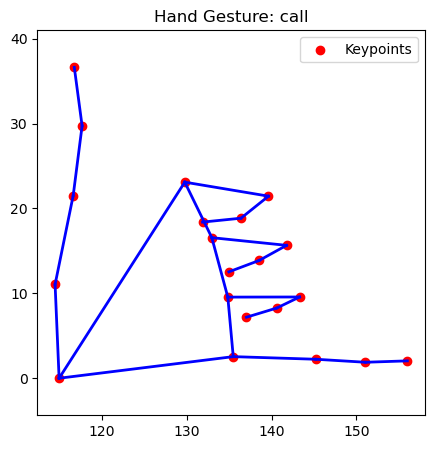

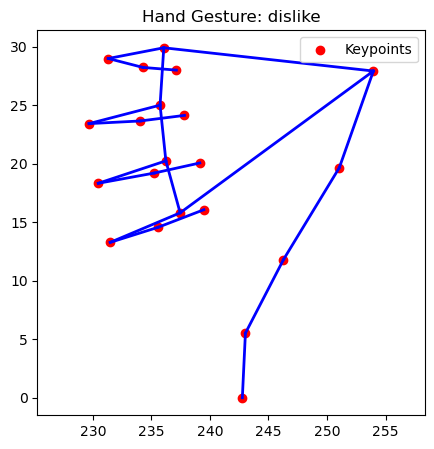

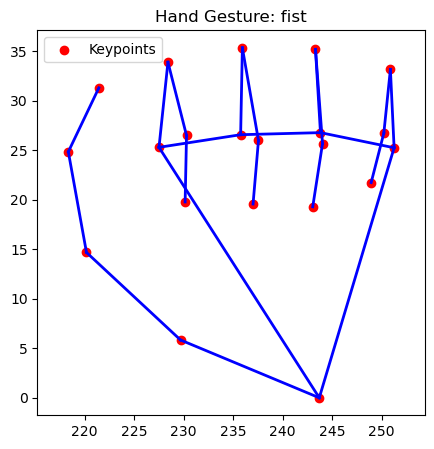

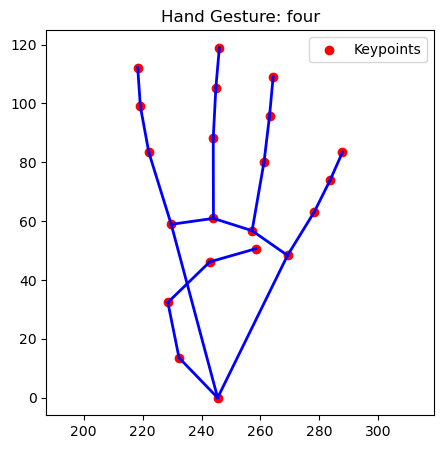

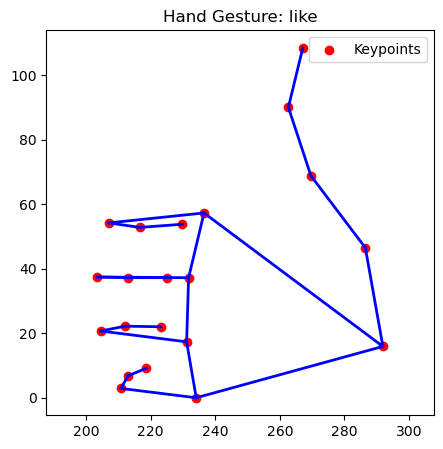

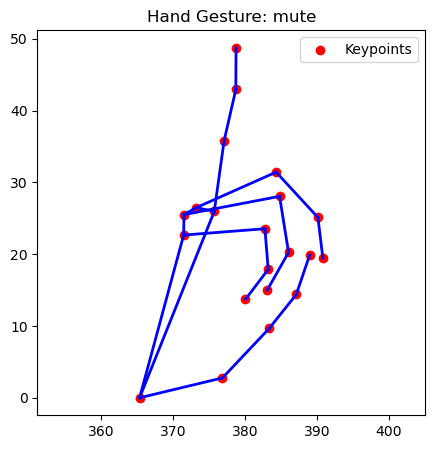

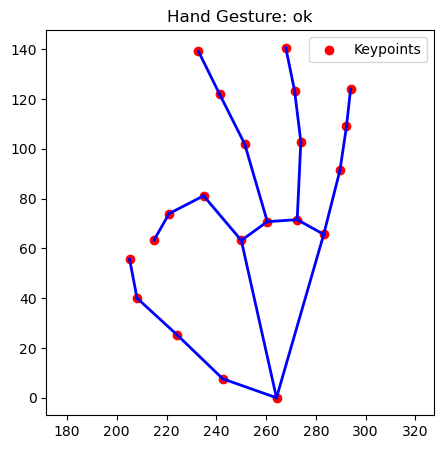

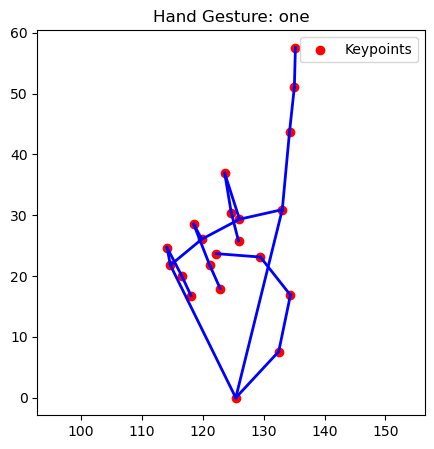

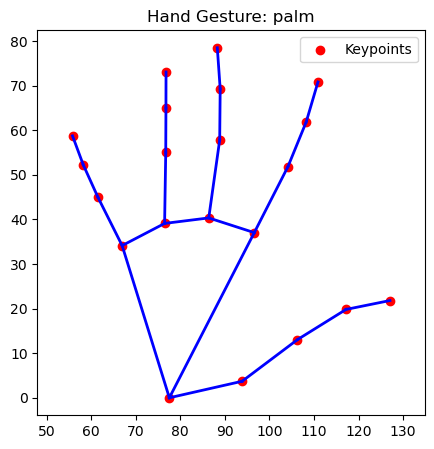

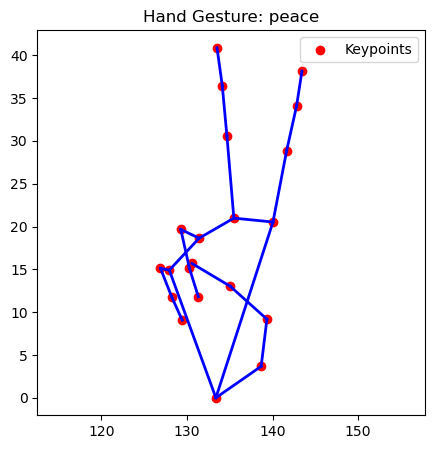

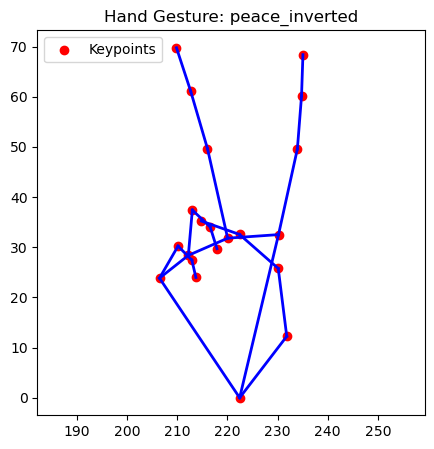

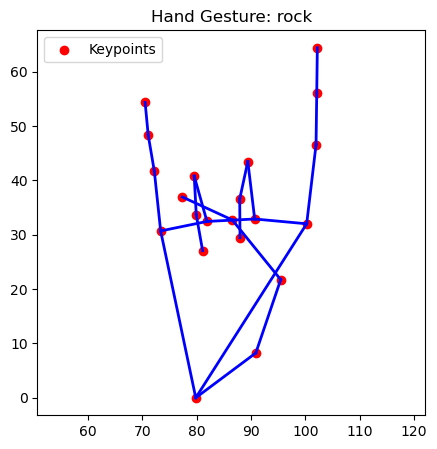

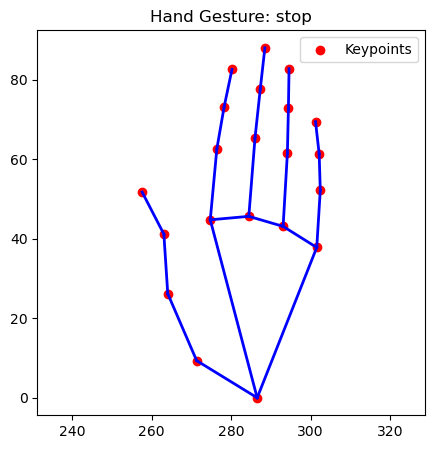

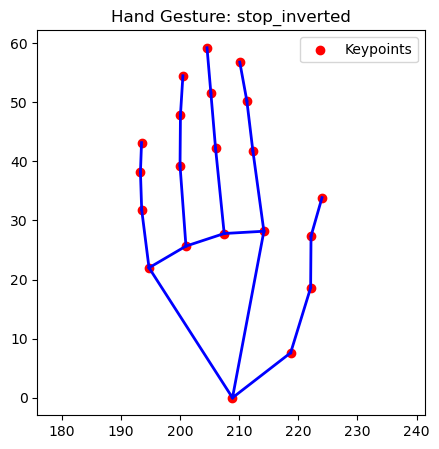

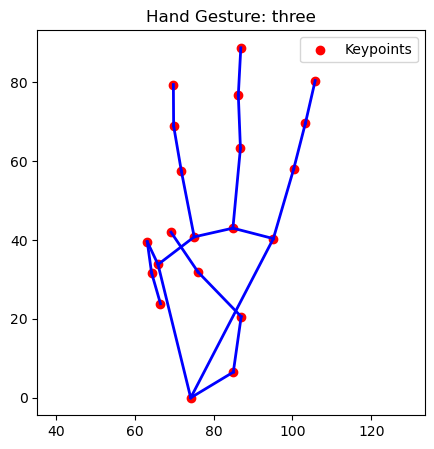

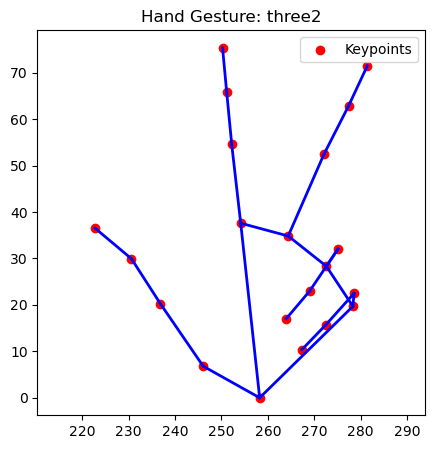

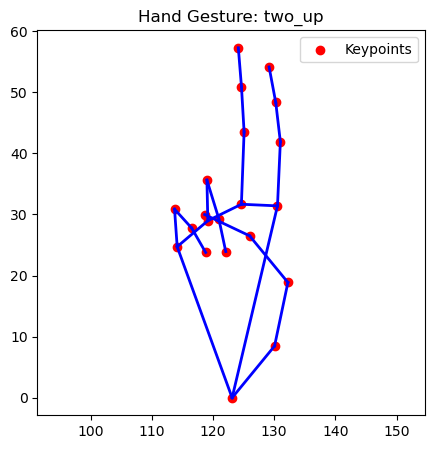

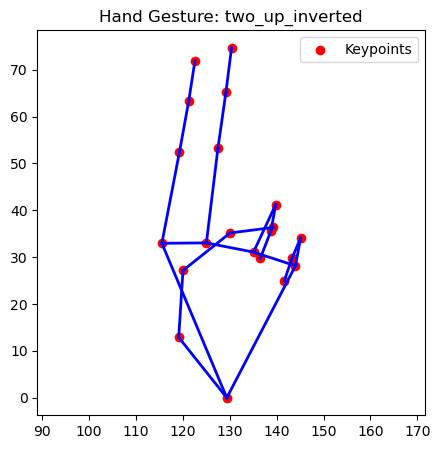

In [ ]:
label_call_df = df[df['label'] == 'call']
plot_hand_gesture(label_call_df, 3)
label_dislike_df = df[df['label'] == 'dislike']
plot_hand_gesture(label_dislike_df, 15)
label_fist_df = df[df['label'] == 'fist']
plot_hand_gesture(label_fist_df, 34)
label_four_df = df[df['label'] == 'four']
plot_hand_gesture(label_four_df, 14)
label_like_df = df[df['label'] == 'like']
plot_hand_gesture(label_like_df, 2)
label_mute_df = df[df['label'] == 'mute']
plot_hand_gesture(label_mute_df, 1)
label_ok_df = df[df['label'] == 'ok']
plot_hand_gesture(label_ok_df, 34)
label_one_df = df[df['label'] == 'one']
plot_hand_gesture(label_one_df, 6)
label_palm_df = df[df['label'] == 'palm']
plot_hand_gesture(label_palm_df, 20)
label_peace_df = df[df['label'] == 'peace']
plot_hand_gesture(label_peace_df, 7)
label_peace_inverted_df = df[df['label'] == 'peace_inverted']
plot_hand_gesture(label_peace_inverted_df, 61)
label_rock_df = df[df['label'] == 'rock']
plot_hand_gesture(label_rock_df, 3)
label_stop_df = df[df['label'] == 'stop']
plot_hand_gesture(label_stop_df, 4)
label_stop_inverted_df = df[df['label'] == 'stop_inverted']
plot_hand_gesture(label_stop_inverted_df, 10)
label_three_df = df[df['label'] == 'three']
plot_hand_gesture(label_three_df, 10)
label_three2_df = df[df['label'] == 'three2']
plot_hand_gesture(label_three2_df, 10)
label_two_up_df = df[df['label'] == 'two_up']
plot_hand_gesture(label_two_up_df, 10)
label_two_up_inverted_df = df[df['label'] == 'two_up_inverted']
plot_hand_gesture(label_two_up_inverted_df, 45)

# Data Preprocessing

In [ ]:
# checking the total nulls in the data
print(df.isnull().sum().sum())

0


In [ ]:
# Checking if there are duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


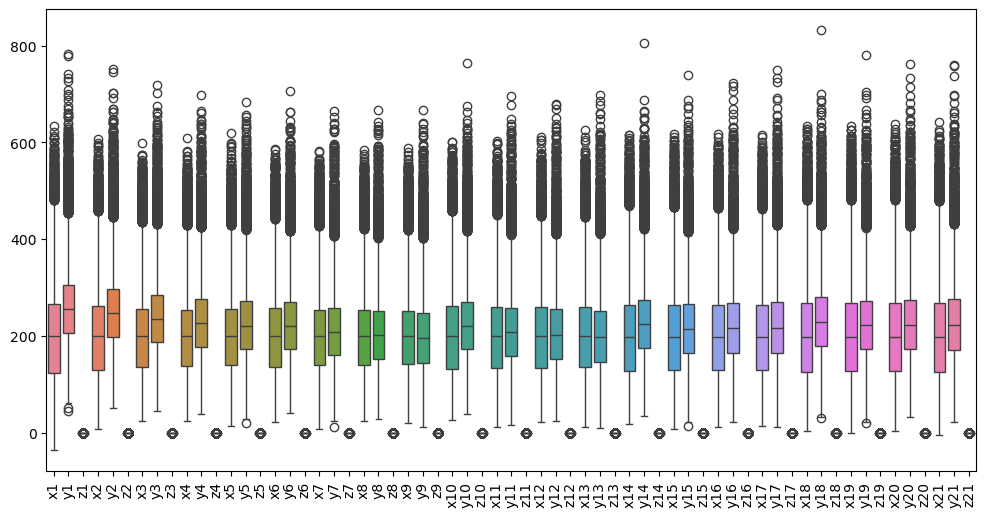

In [ ]:
# Check the Distribution of Data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.show()

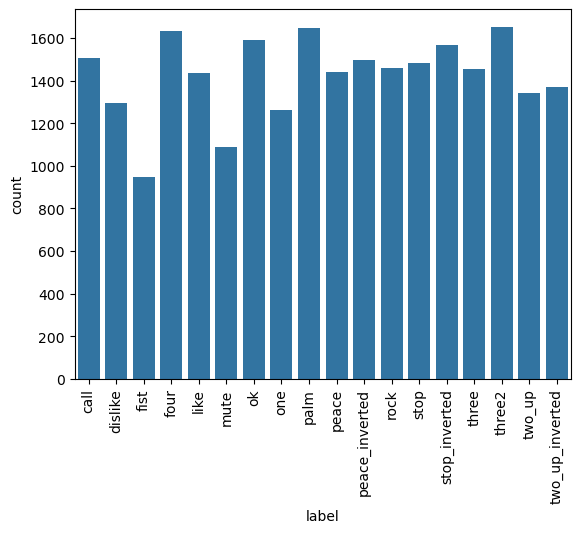

In [ ]:
# Checking if the data is balanced or not
sns.countplot(x=df['label'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Normalizing Hand Landmarks
def preprocess_hand_landmarks(df):
    """
    Recenter and normalize hand landmarks.

    - Recenter: Make wrist (landmark 0) the origin.
    - Normalize: Divide all landmarks by the middle finger tip (landmark 12).
    - Keep z values unchanged.

    Parameters:
        df (pd.DataFrame): DataFrame with columns ['x1', 'y1', 'z1', ..., 'x21', 'y21', 'z21']

    Returns:
        pd.DataFrame: Preprocessed hand landmark data.
    """
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    df_processed = df.copy()

    for i in range(1,22):  # 21 landmarks (1 to 21)
        df_processed[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df_processed[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    return df_processed

In [ ]:
# Applying Normalization on the data
df_preprocessed = preprocess_hand_landmarks(df)
df_preprocessed.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,0.0,0.0,-3.649205e-07,-0.010549,-0.020478,0.004224,-0.031708,-0.031308,0.005798,-0.052794,-0.031836,0.005872,-0.065463,-0.026828,0.005236,-0.049288,-0.048345,0.000154,-0.074348,-0.020197,-0.003813,-0.073536,-0.002889,-0.006753,-0.069313,0.006185,-0.007799,-0.051793,-0.038668,-0.004955,-0.073423,-0.009223,-0.010097,-0.066758,0.006319,-0.014108,-0.060312,0.015955,-0.016854,-0.052977,-0.026085,-0.009528,-0.075436,-0.002191,-0.016194,-0.070859,0.012742,-0.020701,-0.064102,0.021620,-0.023142,-0.052537,-0.011245,-0.013198,-0.078983,-0.003644,-0.020450,-0.095657,0.001627,-0.024577,-0.109790,0.004627,-0.026722,call
1,0.0,0.0,-2.345265e-07,-0.003218,-0.039459,-0.011102,0.015174,-0.077859,-0.021096,0.027717,-0.106443,-0.029252,0.025075,-0.132518,-0.034743,0.056376,-0.085621,-0.022332,0.097587,-0.064493,-0.033495,0.083635,-0.054453,-0.039811,0.068028,-0.056586,-0.044990,0.066100,-0.062425,-0.024038,0.097243,-0.043930,-0.032438,0.080500,-0.036632,-0.033811,0.069533,-0.037953,-0.036610,0.071449,-0.035717,-0.026222,0.103852,-0.024618,-0.034942,0.091214,-0.020141,-0.030081,0.079406,-0.021224,-0.027561,0.074182,-0.009272,-0.029042,0.110731,-0.009618,-0.038175,0.134010,-0.007284,-0.037336,0.155791,-0.006863,-0.036136,call
2,0.0,0.0,-2.417307e-07,0.015856,-0.038550,-0.000184,0.040141,-0.075252,-0.009687,0.056924,-0.105383,-0.020580,0.055606,-0.130958,-0.029497,0.081089,-0.071336,-0.016897,0.118624,-0.046049,-0.023851,0.106303,-0.032575,-0.024241,0.091112,-0.031636,-0.024215,0.086087,-0.047147,-0.025533,0.119208,-0.023518,-0.029864,0.104996,-0.011521,-0.027649,0.090761,-0.012843,-0.027500,0.087616,-0.018816,-0.033584,0.121097,0.000525,-0.038898,0.107732,0.010383,-0.033344,0.093174,0.008789,-0.030234,0.087153,0.011009,-0.041256,0.128732,0.017222,-0.044068,0.153686,0.022725,-0.040469,0.175431,0.024775,-0.038301,call
3,0.0,0.0,-1.233261e-07,-0.001042,-0.024325,-0.002824,0.003656,-0.047383,-0.008911,0.005965,-0.065458,-0.015029,0.003942,-0.080647,-0.019514,0.032597,-0.050862,-0.010413,0.054311,-0.047227,-0.016497,0.047179,-0.041513,-0.020082,0.037216,-0.040501,-0.023151,0.039615,-0.036461,-0.014133,0.058996,-0.034470,-0.018309,0.051891,-0.030549,-0.019228,0.044032,-0.027596,-0.021387,0.043759,-0.021043,-0.017837,0.062366,-0.021074,-0.021707,0.056465,-0.018212,-0.018406,0.048602,-0.015828,-0.017291,0.045171,-0.005603,-0.021804,0.066556,-0.004926,-0.027622,0.079458,-0.004145,-0.027863,0.090332,-0.004505,-0.027723,call
4,0.0,0.0,-1.622995e-07,-0.000814,-0.040861,-0.002884,0.009452,-0.091081,-0.008115,0.011141,-0.127621,-0.013397,-0.001648,-0.152212,-0.017483,0.041608,-0.091627,-0.013008,0.090719,-0.086985,-0.019843,0.079876,-0.072061,-0.022405,0.063556,-0.068485,-0.024263,0.052022,-0.068491,-0.016029,0.095953,-0.063800,-0.021682,0.084270,-0.051459,-0.022350,0.068998,-0.049048,-0.023731,0.062370,-0.043735,-0.018826,0.103187,-0.041606,-0.023907,0.091495,-0.032055,-0.020978,0.074947,-0.030319,-0.019323,0.072084,-0.019080,-0.021623,0.112382,-0.028064,-0.025113,0.136505,-0.032746,-0.024087,0.156538,-0.039290,-0.023486,call


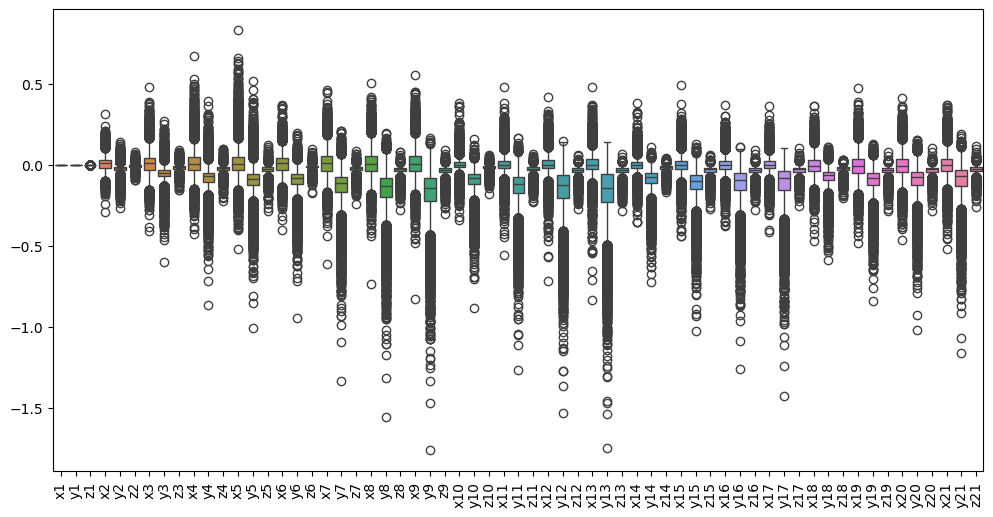

In [ ]:
# Visualizing to make sure data is normalized correctly
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_preprocessed.iloc[:, :-1])
plt.xticks(rotation=90)
plt.show()

**Normalization:**

- SVM -> Standardization

- XGBoost -> Standaradization

- Random Forest -> No Normalization

In [ ]:
# Splitting Data to features and labels
X = df_preprocessed.drop(columns=['label'])  # Features
y = df_preprocessed['label']  # Labels

In [12]:
# categorical labels -> numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# making sure that labels are encoded to be numerical labels
y

array([ 0,  0,  0, ..., 17, 17, 17])

In [14]:
# Splitting the Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Normalization (for XGBoost and SVM)
scaler = StandardScaler()

In [16]:
# Random Forest (no normalization)
X_train_rf, X_test_rf = X_train.copy(), X_test.copy()

# XGBoost (standardization applied)
X_train_xgb, X_test_xgb = scaler.fit_transform(X_train), scaler.transform(X_test)

# SVM (standardization applied)
X_train_svm, X_test_svm = scaler.fit_transform(X_train), scaler.transform(X_test)

In [ ]:
# to be used for the video
import joblib

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

# Model Training and Evaluation

In [ ]:
# Random Forest (1st trial)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred_rf = rf_model.predict(X_test_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest - Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}, F1-score: {f1_rf:.4f}")

Random Forest - Accuracy: 0.9535, Precision: 0.9540, Recall: 0.9535, F1-score: 0.9536


In [ ]:
# XGBoost (1st trial)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_xgb, y_train)
y_pred_xgb = xgb_model.predict(X_test_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
rec_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print(f"XGBoost - Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}, Recall: {rec_xgb:.4f}, F1-score: {f1_xgb:.4f}")

XGBoost - Accuracy: 0.9661, Precision: 0.9665, Recall: 0.9661, F1-score: 0.9662


In [ ]:
# SVM (1st trial)
svm_model = SVC(kernel="rbf", C=1, gamma="scale")
svm_model.fit(X_train_svm, y_train)
y_pred_svm = svm_model.predict(X_test_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM - Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-score: {f1_svm:.4f}")

SVM - Accuracy: 0.9562, Precision: 0.9576, Recall: 0.9562, F1-score: 0.9564


## Hyperparameters Tuning

### Random Forest

In [ ]:
# Trying Random Search for Hyperparameters Tuning to Choose best Hyperparameters
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['sqrt', 'log2'], 
    'bootstrap': [True, False] 
}
halving_search = HalvingRandomSearchCV(
    RandomForestClassifier(random_state=42), 
    param_dist, 
    factor=2,  
    min_resources='smallest', 
    cv=3,  
    n_jobs=-1,  
    verbose=1
)
halving_search.fit(X_train_rf, y_train)

for i in range(len(halving_search.cv_results_["mean_test_score"])):
    print(f"Trial {i + 1}: Accuracy = {halving_search.cv_results_['mean_test_score'][i]:.4f}")


best_rf = halving_search.best_estimator_

n_iterations: 8
n_required_iterations: 8
n_possible_iterations: 8
min_resources_: 108
max_resources_: 20540
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 190
n_resources: 108
Fitting 3 folds for each of 190 candidates, totalling 570 fits
----------
iter: 1
n_candidates: 95
n_resources: 216
Fitting 3 folds for each of 95 candidates, totalling 285 fits


c:\Users\Hend-PC\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 2
n_candidates: 48
n_resources: 432
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 3
n_candidates: 24
n_resources: 864
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 4
n_candidates: 12
n_resources: 1728
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 5
n_candidates: 6
n_resources: 3456
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 6
n_candidates: 3
n_resources: 6912
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 7
n_candidates: 2
n_resources: 13824
Fitting 3 folds for each of 2 candidates, totalling 6 fits


c:\Users\Hend-PC\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Trial 1: Accuracy = 0.3656
Trial 2: Accuracy = 0.3653
Trial 3: Accuracy = 0.4680
Trial 4: Accuracy = 0.4585
Trial 5: Accuracy = 0.4034
Trial 6: Accuracy = 0.4495
Trial 7: Accuracy = 0.4304
Trial 8: Accuracy = 0.3746
Trial 9: Accuracy = 0.3558
Trial 10: Accuracy = 0.4865
Trial 11: Accuracy = 0.4304
Trial 12: Accuracy = 0.3656
Trial 13: Accuracy = 0.4122
Trial 14: Accuracy = 0.4214
Trial 15: Accuracy = 0.4865
Trial 16: Accuracy = 0.4214
Trial 17: Accuracy = 0.3656
Trial 18: Accuracy = 0.3656
Trial 19: Accuracy = 0.4212
Trial 20: Accuracy = 0.4675
Trial 21: Accuracy = 0.3839
Trial 22: Accuracy = 0.4122
Trial 23: Accuracy = 0.4214
Trial 24: Accuracy = 0.4590
Trial 25: Accuracy = 0.4495
Trial 26: Accuracy = 0.4495
Trial 27: Accuracy = 0.4032
Trial 28: Accuracy = 0.3746
Trial 29: Accuracy = 0.4304
Trial 30: Accuracy = 0.4497
Trial 31: Accuracy = 0.3561
Trial 32: Accuracy = 0.4680
Trial 33: Accuracy = 0.4497
Trial 34: Accuracy = 0.4217
Trial 35: Accuracy = 0.4034
Trial 36: Accuracy = 0.4683
T

In [ ]:
# Best Random Forest Model So Far with the Best Hyperparameters
best_rf

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=300,
                       random_state=42)

In [ ]:
# Evaluation of Random Forest Optimized Model
best_rf.fit(X_train_rf, y_train)

y_pred = best_rf.predict(X_test_rf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Optimized Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Optimized Random Forest - Accuracy: 0.9583, Precision: 0.9590, Recall: 0.9588, F1-score: 0.9587


In [ ]:
# Saving the Random Forest Model to be Used Later
with open("best_rf.pkl", "wb") as file:
    pickle.dump(best_rf, file)

### XGBoost

In [ ]:
# Trying Optuna for Hyperparameters Tuning to Choose best Hyperparameters
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0, 1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42
    )

    model.fit(X_train_xgb, y_train)
    y_pred = model.predict(X_test_xgb)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    trial.set_user_attr("accuracy", acc)
    trial.set_user_attr("f1_weighted", f1)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective_xgb, n_trials=50)
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2025-03-29 16:15:17,615] A new study created in memory with name: no-name-03c58a86-951e-4623-bc11-c1df463276c9
[I 2025-03-29 16:15:30,926] Trial 0 finished with value: 0.9706381636493318 and parameters: {'n_estimators': 229, 'learning_rate': 0.2734582265250116, 'max_depth': 5, 'min_child_weight': 7, 'gamma': 0.3213365142595257, 'subsample': 0.7463754379141248, 'colsample_bytree': 0.559799959970171}. Best is trial 0 with value: 0.9706381636493318.
[I 2025-03-29 16:15:41,840] Trial 1 finished with value: 0.9661653401760417 and parameters: {'n_estimators': 123, 'learning_rate': 0.10499603129102128, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 0.9502486540671935, 'subsample': 0.9716433557655855, 'colsample_bytree': 0.6862991649303695}. Best is trial 0 with value: 0.9706381636493318.
[I 2025-03-29 16:15:53,904] Trial 2 finished with value: 0.9640732587108468 and parameters: {'n_estimators': 227, 'learning_rate': 0.248899746210023, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.879

Best Hyperparameters: {'n_estimators': 154, 'learning_rate': 0.2988695404548292, 'max_depth': 4, 'min_child_weight': 4, 'gamma': 0.023642473482838988, 'subsample': 0.8994209695662307, 'colsample_bytree': 0.8870275768042667}


In [ ]:
# Train XGBoost model with the best parameters (from optuna Hyperparameters Tuning)
best_xgb_model = XGBClassifier(**best_params, random_state=42)
best_xgb_model.fit(X_train_xgb, y_train)
# Evaluating XGBoost Optimized Model
y_pred_best = best_xgb_model.predict(X_test_xgb)
acc_best = accuracy_score(y_test, y_pred_best)
prec_best = precision_score(y_test, y_pred_best, average='weighted')
rec_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f"Optimized XGBoost - Accuracy: {acc_best:.4f}, Precision: {prec_best:.4f}, Recall: {rec_best:.4f}, F1-score: {f1_best:.4f}")


Optimized XGBoost - Accuracy: 0.9753, Precision: 0.9755, Recall: 0.9753, F1-score: 0.9753


In [ ]:
# Saving the XGBoost Model to be Used Later
with open("best_xgb_model.pkl", "wb") as file:
    pickle.dump(best_xgb_model, file)

### SVM

In [ ]:
# Trying Optuna for Hyperparameters Tuning to Choose best Hyperparameters
def objective_svm(trial):
    C = trial.suggest_float("C", 1e-3, 1e2)
    gamma = trial.suggest_float("gamma", 1e-4, 1e1)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])

    svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1 = cross_val_score(svm_model, X_train_svm, y_train, cv=skf, scoring=make_scorer(f1_score, average="weighted"))

    return f1.mean()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_svm, n_trials=50, n_jobs=-1)
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2025-03-29 17:00:30,305] A new study created in memory with name: no-name-1621a186-035d-4dd3-af36-0e0cb0c704d3
[I 2025-03-29 17:03:01,275] Trial 0 finished with value: 0.9586247822249568 and parameters: {'C': 27.13321675375431, 'gamma': 1.6343377425939651, 'kernel': 'poly'}. Best is trial 0 with value: 0.9586247822249568.
[I 2025-03-29 17:03:28,799] Trial 2 finished with value: 0.9476168251246317 and parameters: {'C': 13.536404081677048, 'gamma': 9.063047873155764, 'kernel': 'linear'}. Best is trial 0 with value: 0.9586247822249568.
[I 2025-03-29 17:03:38,328] Trial 7 finished with value: 0.9585758450777201 and parameters: {'C': 6.689881133484017, 'gamma': 5.21170022902543, 'kernel': 'poly'}. Best is trial 0 with value: 0.9586247822249568.
[I 2025-03-29 17:03:39,664] Trial 8 finished with value: 0.9585758450777201 and parameters: {'C': 18.6517607801253, 'gamma': 7.08643321501986, 'kernel': 'poly'}. Best is trial 0 with value: 0.9586247822249568.
[I 2025-03-29 17:04:18,284] Trial 5 f

Best hyperparameters: {'C': 8.651030099266345, 'gamma': 5.411966602517352, 'kernel': 'poly'}


In [ ]:
best_params

{'C': 8.651030099266345, 'gamma': 5.411966602517352, 'kernel': 'poly'}

In [ ]:
# Using the Best Hyperparameters for SVM
optimized_svm = SVC(**best_params)
optimized_svm.fit(X_train_svm, y_train)

y_pred_optimized = optimized_svm.predict(X_test_svm)
# Evaluating the Optimized SVM Model
acc_svm = accuracy_score(y_test, y_pred_optimized)
prec_svm = precision_score(y_test, y_pred_optimized, average='weighted')
rec_svm = recall_score(y_test, y_pred_optimized, average='weighted')
f1_svm = f1_score(y_test, y_pred_optimized, average='weighted')

print(f"Optimized SVM - Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}, Recall: {rec_svm:.4f}, F1-score: {f1_svm:.4f}")


Optimized SVM - Accuracy: 0.9616, Precision: 0.9618, Recall: 0.9616, F1-score: 0.9617


In [ ]:
# Saving the SVM Model to be Used Later
with open("optimized_svm_.pkl", "wb") as file:
    pickle.dump(optimized_svm, file)

# Conclusion

y_test -> for all , X_test_rf -> Random Forest , X_test_xgb -> XGBoost , X_test_svm -> SVM

In [ ]:
''''
Comparing between the 3 trained model to choose the best of them 
according to Accuracy, Precision, Recall and F1- Score

'''
model_names = {
    "best_rf.pkl": "Random Forest",
    "optimized_svm_.pkl": "SVM",
    "optimized_xgb.pkl": "XGBoost"
}

results = []

def load_and_evaluate_model(model_path, X_test, y_test):
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_name = model_names.get(model_path, model_path)
    results.append([model_name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"])


In [53]:
from tabulate import tabulate

load_and_evaluate_model("best_rf.pkl", X_test_rf, y_test)
load_and_evaluate_model("optimized_svm_.pkl", X_test_svm, y_test)
load_and_evaluate_model("optimized_xgb.pkl", X_test_xgb, y_test)

# Print results as a Markdown table
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]
print(tabulate(results, headers=headers, tablefmt="github"))


| Model         |   Accuracy |   Precision |   Recall |   F1-score |
|---------------|------------|-------------|----------|------------|
| Random Forest |     0.9583 |      0.9588 |   0.9583 |     0.9584 |
| SVM           |     0.9616 |      0.9618 |   0.9616 |     0.9617 |
| XGBoost       |     0.9762 |      0.9765 |   0.9762 |     0.9763 |


**So, the best of them is XGBoost , of Accuracy 97.6% and F1-score of 97.6%**

# Video Hand Gesture Classification

In [55]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import joblib

In [ ]:
# Loading the trained model, and the data to be used in classification
model = joblib.load("optimized_xgb.pkl")
scaler = joblib.load("scaler.pkl") 
label_encoder = joblib.load("label_encoder.pkl") 

In [ ]:
# Initialize MediaPipe Hands module
mp_hands = mp.solutions.hands
# Create a Hands object for hand detection and tracking
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)
# Initialize the drawing utility to visualize hand landmarks
mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Define the path to the input video
video_path = "Input_Video.mov"  
# Open the video file for processing
cap = cv2.VideoCapture(video_path)
# Get the frame width and height from the video properties
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))
# Initialize the video writer to save the processed video
out = cv2.VideoWriter("output_video.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))


In [59]:
def preprocess_hand_landmarks(landmarks):
    """
    Process hand landmarks for model inference.

    Parameters:
        landmarks (list): List of 21 landmark points (x, y, z).

    Returns:
        np.array: Scaled feature array.
    """
    df = pd.DataFrame([landmarks], columns=[f"{axis}{i}" for i in range(1, 22) for axis in ['x', 'y', 'z']])
    
    # Extract wrist (landmark 1) and middle finger tip (landmark 13)
    wrist_x, wrist_y = df["x1"], df["y1"]
    mid_x, mid_y = df["x13"], df["y13"]

    # Normalize all landmarks
    for i in range(1, 22):  
        df[f"x{i}"] = (df[f"x{i}"] - wrist_x) / (abs(mid_x) + abs(mid_y))
        df[f"y{i}"] = (df[f"y{i}"] - wrist_y) / (abs(mid_x) + abs(mid_y))

    # Scale features
    return scaler.transform(df)

In [ ]:
# Mapping for inverting the encoded labels
gesture_names = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm", "peace", 
    "peace_inverted", "rock", "stop", "stop_inverted", "three", "three2", "two_up", "two_up_inverted"
]

In [61]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit if video ends

    # Convert frame to RGB for MediaPipe
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process hand detection
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Extract landmark positions
            landmarks = []
            for i, landmark in enumerate(hand_landmarks.landmark):
                landmarks.extend([landmark.x, landmark.y, landmark.z])

            # Preprocess landmarks
            processed_features = preprocess_hand_landmarks(landmarks)

            # Make prediction
            prediction_prob = model.predict_proba(processed_features)[0]
            predicted_index = np.argmax(prediction_prob)
            predicted_class_name = gesture_names[predicted_index]

            # Draw landmarks and label on frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.putText(frame, f"{predicted_class_name}", (50, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3,
                        lineType=cv2.LINE_AA)

    # Write frame to output video
    out.write(frame)

    # Display frame
    cv2.imshow("Gesture Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()